In [1]:
import os
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from phathom import io
from skimage.filters import gaussian, laplace
from phathom.utils import pmap_chunks, extract_box, insert_box

In [2]:
working_dir = '/media/jswaney/Drive/Justin/coregistration/gabi_pv'

In [3]:
pv_path = 'pvtdtomato_zarrstack/1_1_1'

pv_img = io.zarr.open(os.path.join(working_dir, pv_path))

pv_img.shape

(256, 7275, 5529)

In [4]:
def log_filter(img, sigma):
    g = gaussian(img, sigma=sigma)
    return laplace(g)

In [5]:
def dog_filter(img, sigma1, sigma2):
    g1 = gaussian(img, sigma=sigma1, preserve_range=True)
    g2 = gaussian(img, sigma=sigma2, preserve_range=True)
    return g1-g2

In [10]:
def filter_chunk(arr, start_coord, chunks, output, overlap, filt, args):
    start_overlap = np.maximum(start_coord - overlap, np.zeros(3, dtype=np.int))
    stop_overlap = np.minimum(start_coord + np.asarray(chunks) + overlap, np.array(arr.shape))
    stop_coord = np.minimum(start_coord + np.asarray(chunks), np.array(arr.shape))
    data = extract_box(arr, start_overlap, stop_overlap)
    result = filt(data, *args)
    valid_result = extract_box(result, start_coord-start_overlap, stop_coord-start_overlap)
    insert_box(output, start_coord, stop_coord, valid_result)

In [11]:
pv_log_path = 'pvtdtomato_log'

pv_log_img = io.zarr.new_zarr(path=os.path.join(working_dir, pv_log_path), 
                              shape=pv_img.shape, 
                              chunks=pv_img.chunks,
                              dtype=np.float32)

In [12]:
sigma1 = (1.0, 2.0, 2.0)
sigma2 = (2.0, 4.0, 4.0)
overlap = 16

f = partial(filter_chunk, 
            output=pv_log_img, 
            overlap=overlap, 
            filt=dog_filter,
            args=(sigma1, sigma2))

In [13]:
chunks = (64, 64, 64)
pmap_chunks(f, pv_img, chunks, nb_workers=12)

100%|██████████| 39672/39672 [00:00<00:00, 2336273.79it/s]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [43]:
pv_slice = pv_img[0]

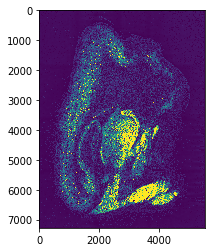

In [46]:
plt.imshow(pv_slice, clim=[0, 600])
plt.show()

In [80]:
pv_log_slice = laplace(gaussian(pv_slice, 4, preserve_range=True))

/home/jswaney/anaconda3/envs/phathom/lib/python3.6/site-packages/skimage/restoration/uft.py:447: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  impr[([slice(1, 2)] * ndim)] = 2.0 * ndim


<IPython.core.display.Javascript object>


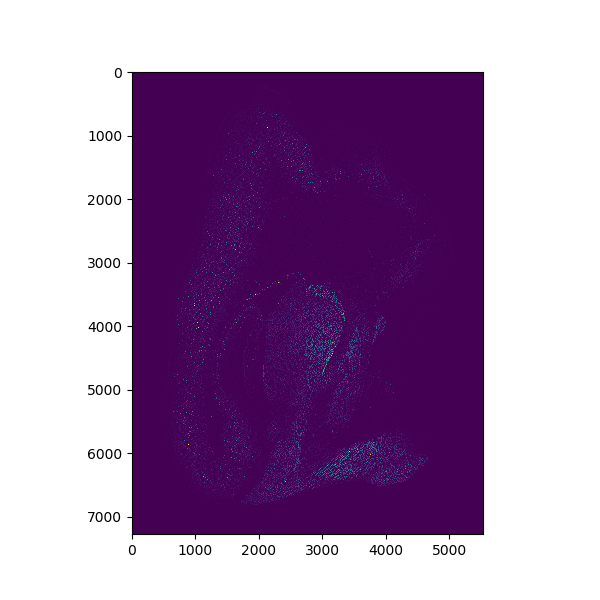

In [81]:
%matplotlib notebook
plt.figure(figsize=(6, 6))
plt.imshow(pv_log_slice, clim=[0, 50])
plt.show()

<IPython.core.display.Javascript object>


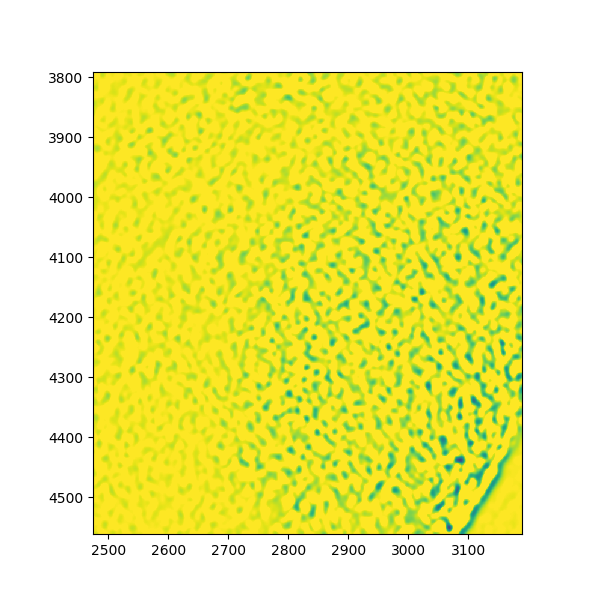

In [79]:
%matplotlib notebook
plt.figure(figsize=(6, 6))
plt.imshow(pv_log_slice, clim=[-50, 0])
plt.show()

In [14]:
log_slice = pv_log_img[0]

In [ ]:
%matplotlib notebook
plt.imshow(log_slice, clim=None)
plt.show()